<a href="https://colab.research.google.com/github/nigamharshit/MNIST_Handwritten_Digit_Clasification_using_Deep_Learning_-Neural_Network-/blob/main/MNIST_Handwritten_Digit_Clasification_using_Deep_Learning_(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Type of X_train is:  <class 'numpy.ndarray'>
Type of Y_train is:  <class 'numpy.ndarray'>

Shape of X_train is:  (60000, 28, 28)
Shape of Y_train is:  (60000,)
Shape of X_test is:  (10000, 28, 28)
Shape of Y_tset is:  (10000,)

Numerical Data 10th Image from X_train:
:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  

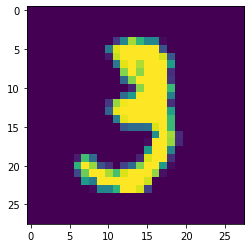

Print the corresponding label of 10th Image from Y_train:  3

Unique values in Y_train:  [0 1 2 3 4 5 6 7 8 9]
Unique values in Y_test:  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6368 - accuracy: 0.8169
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3671 - accuracy: 0.9085
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3053 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2607 - accuracy: 0.9311
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2253 - accuracy: 0.9398
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1992 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1770 - accuracy: 0.9507
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1568 - accuracy: 0.9556
Epoch 9/10
1875/1875 [===

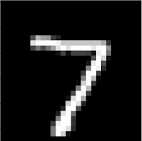

The Handwritten Digit is recognised as  7


In [88]:
# Importing the Dependencies
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import pickle

# Importing the Datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

def eda():
  # Explorartory Data Analysis

  print("Type of X_train is: ",type(X_train))
  print("Type of Y_train is: ",type(Y_train))
  print()
  print("Shape of X_train is: ",X_train.shape)
  print("Shape of Y_train is: ",Y_train.shape)
  print("Shape of X_test is: ",X_test.shape)
  print("Shape of Y_tset is: ",Y_test.shape)
  print()
  print("Numerical Data 10th Image from X_train:\n: ",X_train[10])
  print("Shape of Numerical Data 10th Image from X_train: ",X_train[10].shape)
  print()
  print("Displaying the of 10th Image from X_train:\n")
  plt.imshow(X_train[10])
  plt.show()
  print("Print the corresponding label of 10th Image from Y_train: ",Y_train[10])
  print()
  print("Unique values in Y_train: ",np.unique(Y_train))
  print("Unique values in Y_test: ",np.unique(Y_test))

def data_preprocessing(X_train,X_test):
  # Data Preprocessing

  # Re-scaling the Images
  X_train = X_train/255
  X_test = X_test/255

  # All the Images are already in Dimension 28*28, so no need to do resizng

  # all the Images are already in Grayscale, so no need to do Grayscale Conversion

def model_train():

  # Setting up the layers of the Neural  Network
  model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])

  # Compiling the Neural Network
  model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

  # Training the Neural Network
  model.fit(X_train, Y_train, epochs=10)

def test_results():
  # Accuracy on Test Data
  loss, accuracy = model.evaluate(X_test, Y_test)
  print("Accuracy of Test data: ",accuracy)
  print()

  # model.predict() gives the prediction probability of each class for that data point

  # Predicting the Test Data
  Y_pred = model.predict(X_test)

  # Converting the prediction probabilities to class label for all test data points
  # It will select the maximum probablity to which class it belongs
  Y_pred_labels = [np.argmax(i) for i in Y_pred]

  # Print Confusion Matrix
  conf_mat = confusion_matrix(Y_test, Y_pred_labels)
  print("Confusion Matrix:\n ",conf_mat)
  print()

def predictive_system(model):
  # Building a Predictive System

  input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

  input_image_resize = cv2.resize(grayscale, (28, 28))

  input_image_resize = input_image_resize/255

  image_reshaped = np.reshape(input_image_resize, [1,28,28])

  input_prediction = model.predict(image_reshaped)

  input_pred_label = np.argmax(input_prediction)

  print('The Handwritten Digit is recognised as ', input_pred_label)



if __name__ == '__main__':

  # For Exploratory Data Analysis
  eda()

  # For Data Preprocessing
  data_preprocessing(X_train,X_test)

  # For training the model
  model_train()

  # For model Accuracy
  test_results()

  # For predicting a single image
  predictive_system(model)
